# Beats Per Minute Prediction - Exploratory Data Analysis (EDA)

This notebook forms part of a larger project focused on predicting Beats per Minute (BPM) using a dataset of music track attributes. Here, we analyze the data to identify patterns, understand feature behavior, find relationships with the target variable, and build a foundation for effective predictive modeling.

In this section, the focus is on Exploratory Data Analysis (EDA), examining the dataset's structure, quality, and underlying patterns to gain insights that inform data preparation and modeling choices.

The objectives are to:

- Review the dataset's structure and data quality
- Explore feature distributions and relationships
- Perform statistical tests to find significant predictors
- Generate initial insights to support feature selection and model development

### Familiarizing with the Dataset
This dataset contains **524,163 rows and 11 columns**, capturing a range of audio and musical characteristics for each track.
Below is a brief overview of variables:
| Variable                      | Description                                                            |
| ----------------------------- | ---------------------------------------------------------------------- |
| **id**                        | Unique identifier for each track.                                      |
| **RhythmScore**               | Measures the rhythmic stability or complexity of the music.            |
| **AudioLoudness**             | Represents the overall loudness level of the track.                    |
| **VocalContent**              | Indicates the presence and intensity of vocals.                        |
| **AcousticQuality**           | Reflects how acoustic or natural the instrumentation is.               |
| **InstrumentalScore**         | Captures the richness and strength of instrumental components.         |
| **LivePerformanceLikelihood** | Estimates how similar the track is to a live performance.              |
| **MoodScore**                 | Encodes the emotional tone or mood of the track.                       |
| **TrackDurationMs**           | Duration of the track in milliseconds.                                 |
| **Energy**                    | Measures the intensity and activity level of the track.                |
| **BeatsPerMinute**            | **Target variable** — tempo of the track measured in beats per minute. |


### Import Packages 

In [22]:
# For data manipulation
import numpy as np
import pandas as pd
from pathlib import Path

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical tests 
from scipy.stats import mannwhitneyu, chi2_contingency, skew, kurtosis, pearsonr, spearmanr, f_oneway
from sklearn.feature_selection import mutual_info_regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
# Set default style for visuals 
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = '500'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.linestyle'] = '--'

# Define color palette
HIST_COLOR = '#2E86AB'
BOX_COLOR = '#A23B72'

### Load Dataset

In [9]:
# Move one level up (to the project root), then into data/raw
data_dir = Path().resolve().parent / "data" / "raw"

# Load dataset
df = pd.read_csv(data_dir / "train.csv")

print(f" Dataset loaded successfully from: {data_dir}")
df.head()

 Dataset loaded successfully from: C:\Users\hp\Documents\DA projects\Beats_per_second\data\raw


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [11]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [13]:
# Count 'unknown' values across all columns
(df == 'unknown').sum()

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

In [15]:
# Check for duplicates
df.duplicated().sum()

0

## Target Variable Analysis
#### Understanding BeatsPerMinuteDistribution

This essential preliminary step focuses exclusively on the target variable, Beats Per Minute (BPM), to define its statistical properties before integrating features.

The primary goal is to derive key insights regarding BPM's central tendency, dispersion, and distributional shape. This analysis directly informs critical modeling decisions.

In [28]:
# Extract target variable
target = df["BeatsPerMinute"]


# 1. Summary Statistics

summary_stats = {
    "Mean": target.mean(),
    "Median": target.median(),
    "Standard Deviation": target.std(),
    "Minimum": target.min(),
    "Maximum": target.max(),
    "Skewness": skew(target),
    "Kurtosis": kurtosis(target)
}

print(" Summary Statistics for BeatsPerMinute:\n")
for k, v in summary_stats.items():
    print(f"{k}: {v:.4f}")

 Summary Statistics for BeatsPerMinute:

Mean: 119.0349
Median: 118.7477
Standard Deviation: 26.4681
Minimum: 46.7180
Maximum: 206.0370
Skewness: 0.0715
Kurtosis: -0.1545


The BPM distribution exhibits low skewness and is approximately normal.

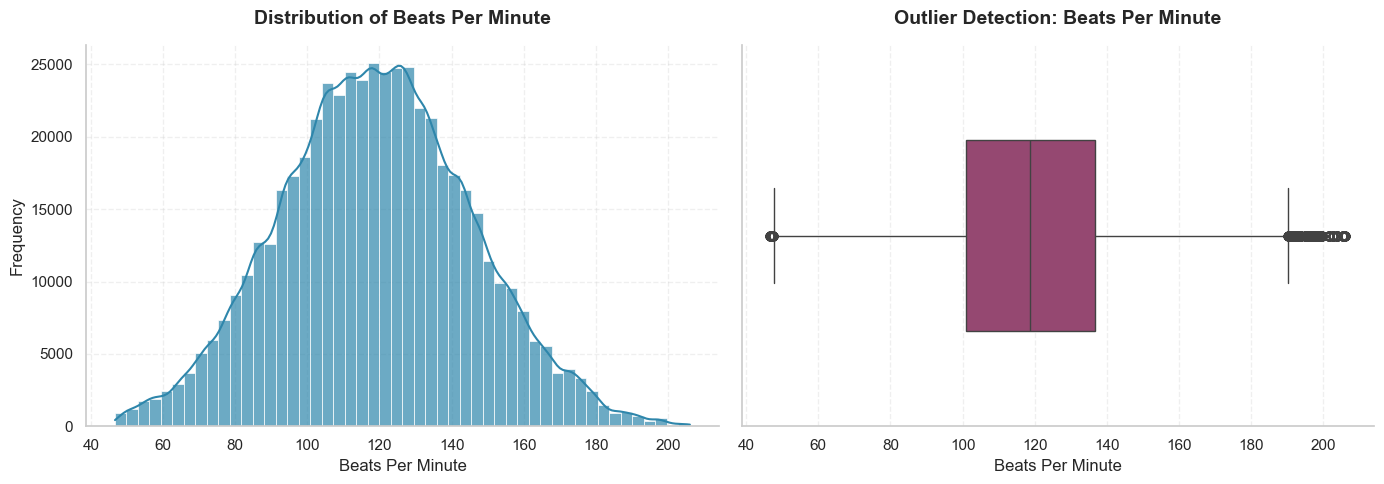

In [26]:
# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Set overall style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'

# 1. Histogram + KDE (left plot)
sns.histplot(target, kde=True, bins=50, ax=axes[0], color='#2E86AB', 
             edgecolor='white', linewidth=0.5, alpha=0.7)
axes[0].set_title("Distribution of Beats Per Minute", fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel("Beats Per Minute", fontsize=12, fontweight='500')
axes[0].set_ylabel("Frequency", fontsize=12, fontweight='500')
axes[0].grid(alpha=0.3, linestyle='--')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# 2. Boxplot (right plot)
box = sns.boxplot(x=target, ax=axes[1], color='#A23B72', width=0.5)
axes[1].set_title("Boxplot: Beats Per Minute", fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel("Beats Per Minute", fontsize=12, fontweight='500')
axes[1].grid(alpha=0.3, linestyle='--', axis='x')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Collectively, the summary statistics and visualization confirm that the Beats Per Minute (BPM) distribution is well-behaved, near-normal, and robust. While outliers are present, they are interpreted as legitimate representations of naturally occurring slow and fast musical tempos. The target variable is suitable for direct application in both linear and non-linear regression models without requiring aggressive preprocessing or complex transformations.

### Feature Distribution  Analysis

#### Examining Individual Feature Characteristics

This section examines how values are spread out across each predictor variable (feature) in the dataset. We assess both the shape (skewness, kurtosis) and the spread of each feature.

In [34]:
# Drop ID column
df = df.drop(columns=["id"], errors="ignore")

# Separate features from target
features = df.drop(columns=["BeatsPerMinute"]).columns




In [84]:
# Skewness & Kurtosis Table
skew_kurt = {}

for col in features:
    skew_kurt[col] = {
        "Skewness": skew(df[col]),
        "Kurtosis": kurtosis(df[col])
    }

import pandas as pd
skew_kurt_df = pd.DataFrame(skew_kurt).T
print("\n Skewness and Kurtosis for all Features:\n")
display(skew_kurt_df)




 Skewness and Kurtosis for All Features:



,Skewness,Kurtosis
RhythmScore,0.168154,-0.526738
AudioLoudness,-0.308513,-0.388412
VocalContent,0.789109,-0.147717
AcousticQuality,0.785963,0.267127
InstrumentalScore,1.036282,0.156398
LivePerformanceLikelihood,0.393321,-0.754141
MoodScore,-0.268819,-0.142285
TrackDurationMs,-0.190482,-0.129164
Energy,-0.030343,-1.209077


The skewness and kurtosis analysis reveals varying distribution shapes across features:

- Moderately skewed features include InstrumentalScore (1.04), VocalContent (0.79), and AcousticQuality (0.79), indicating right-skewed distributions with longer tails toward higher values. These features may benefit from log or power transformations if model performance suffers.

- Near-symmetric features such as RhythmScore (0.17), Energy (-0.03), and AudioLoudness (-0.31) show minimal skewness, suggesting relatively normal distributions that require no immediate transformation.

- Kurtosis values are generally close to zero, indicating distributions similar to normal in terms of tail weight. The exception is Energy (-1.21), which shows a flatter distribution with lighter tails (platykurtic), and LivePerformanceLikelihood (-0.75), also somewhat flat.

Overall, most features exhibit reasonable distributions, though some right-skewed variables may warrant transformation during feature engineering.

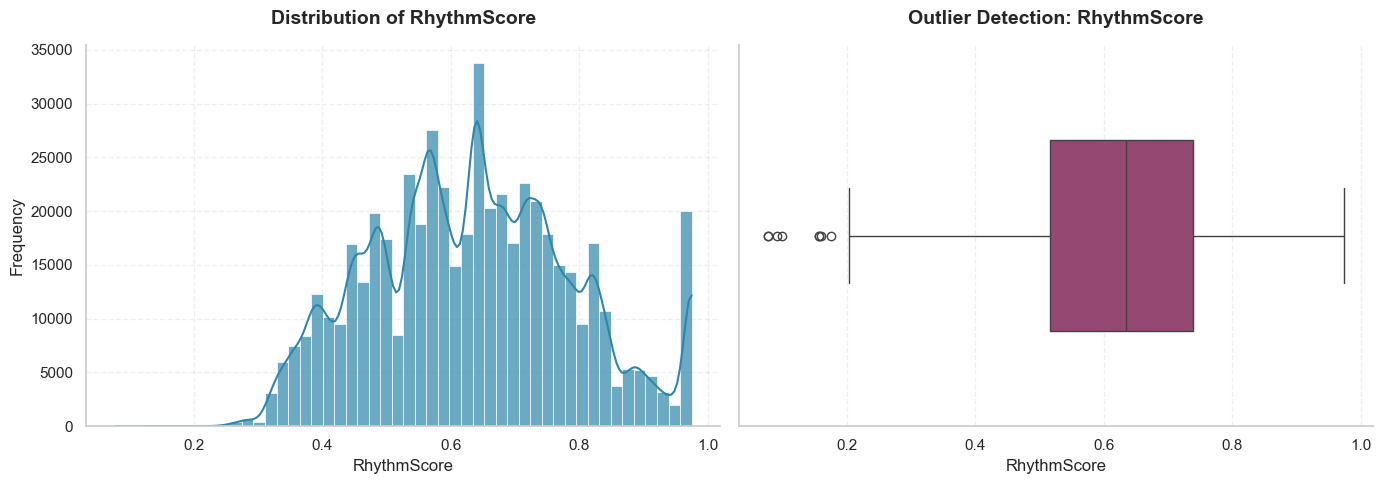

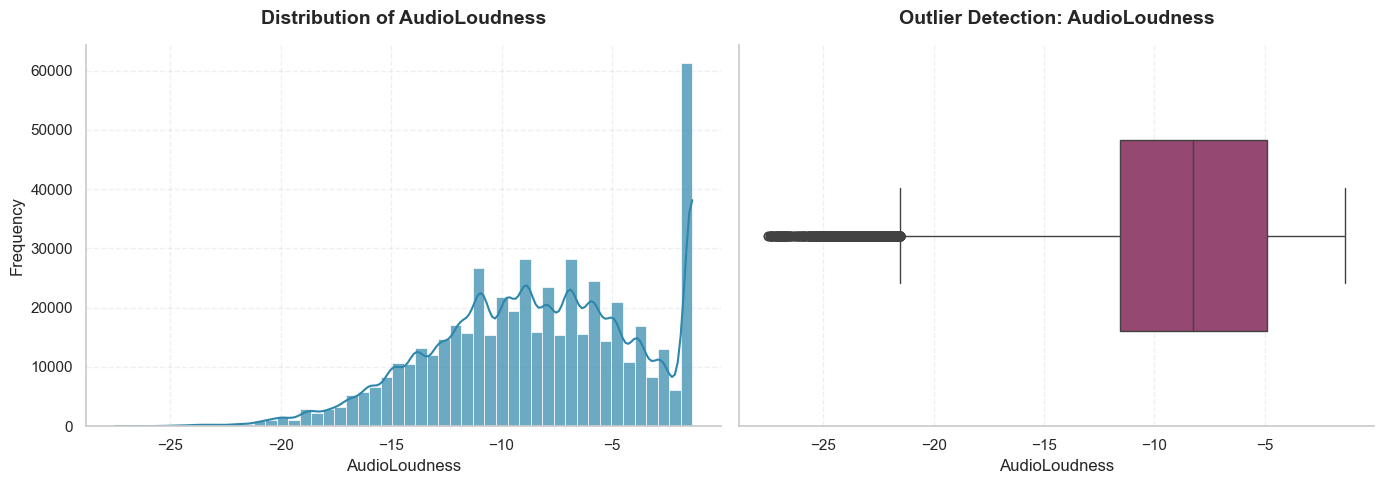

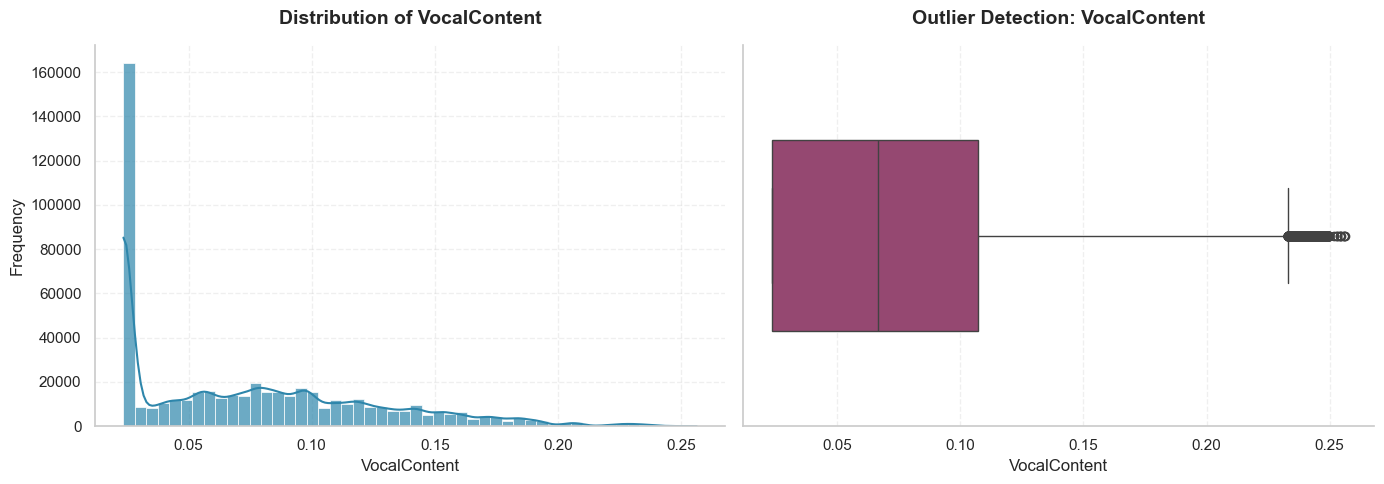

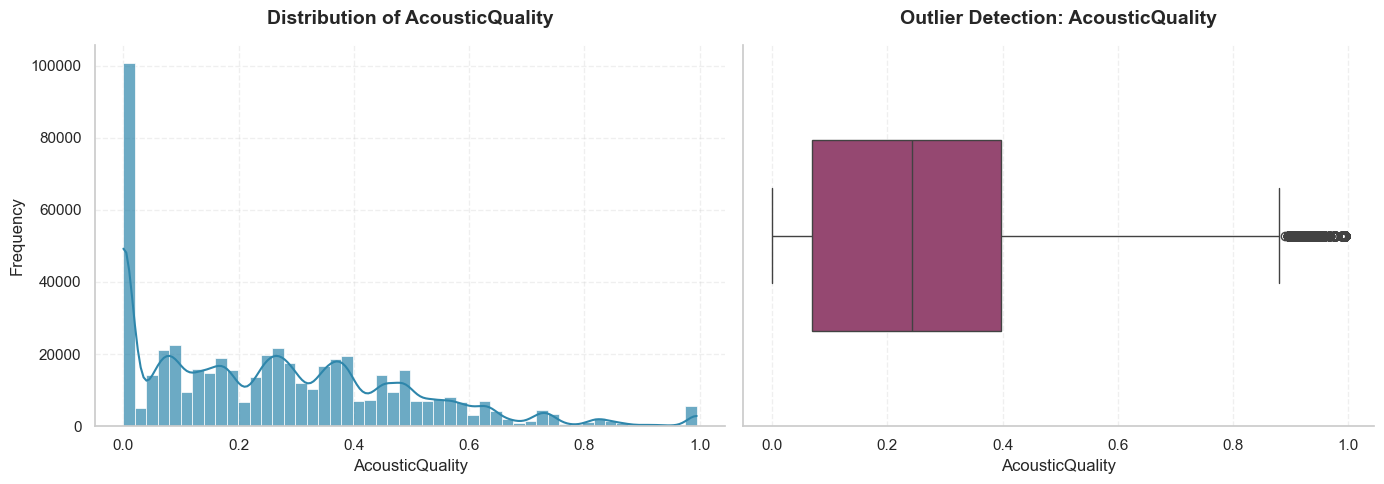

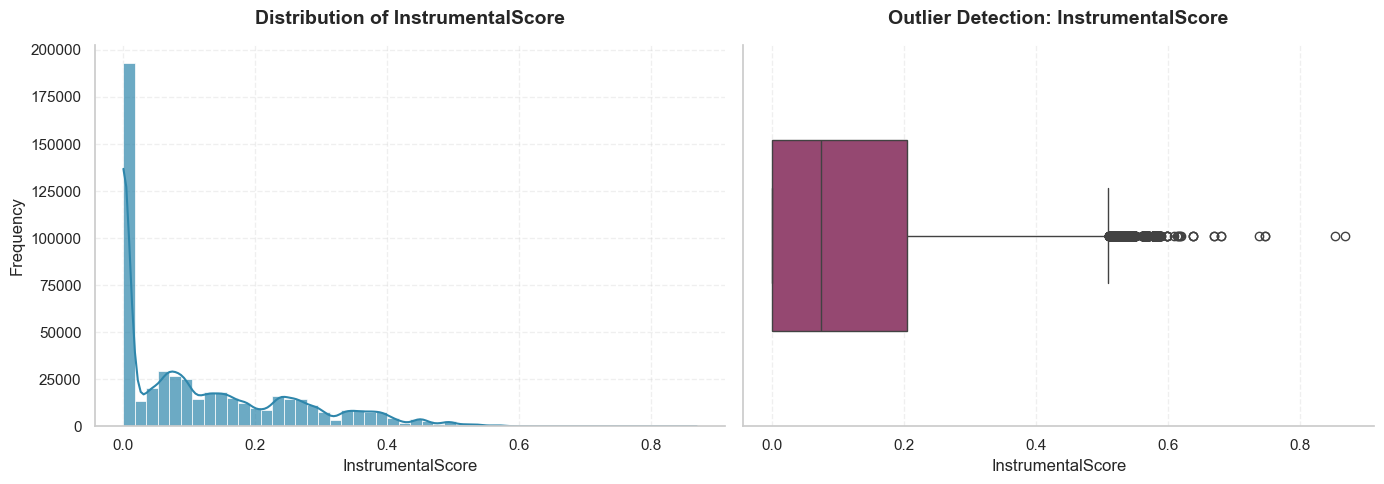

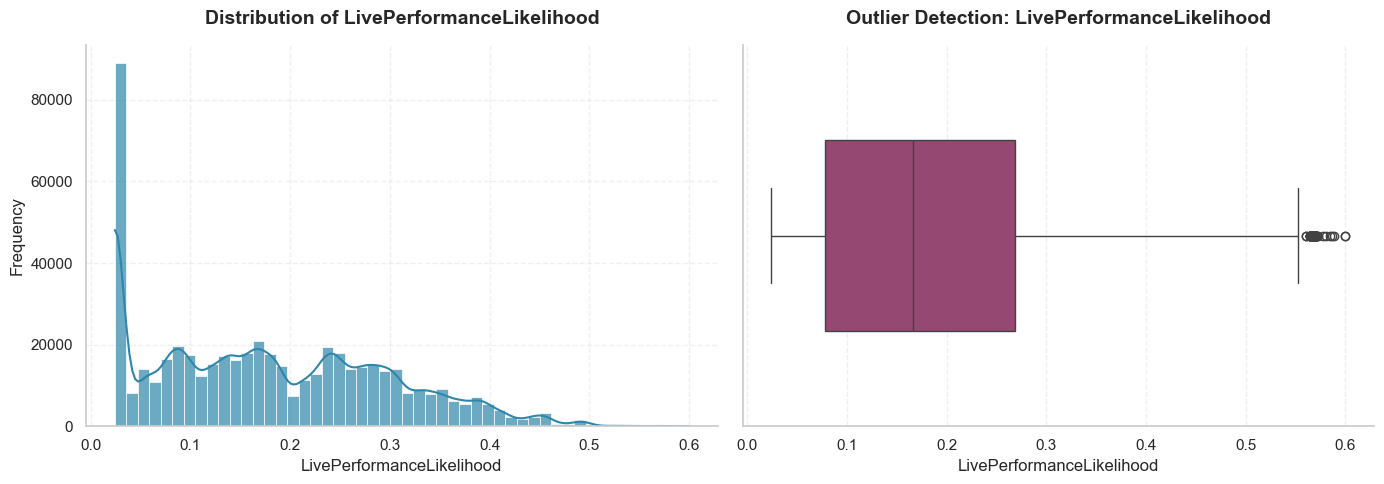

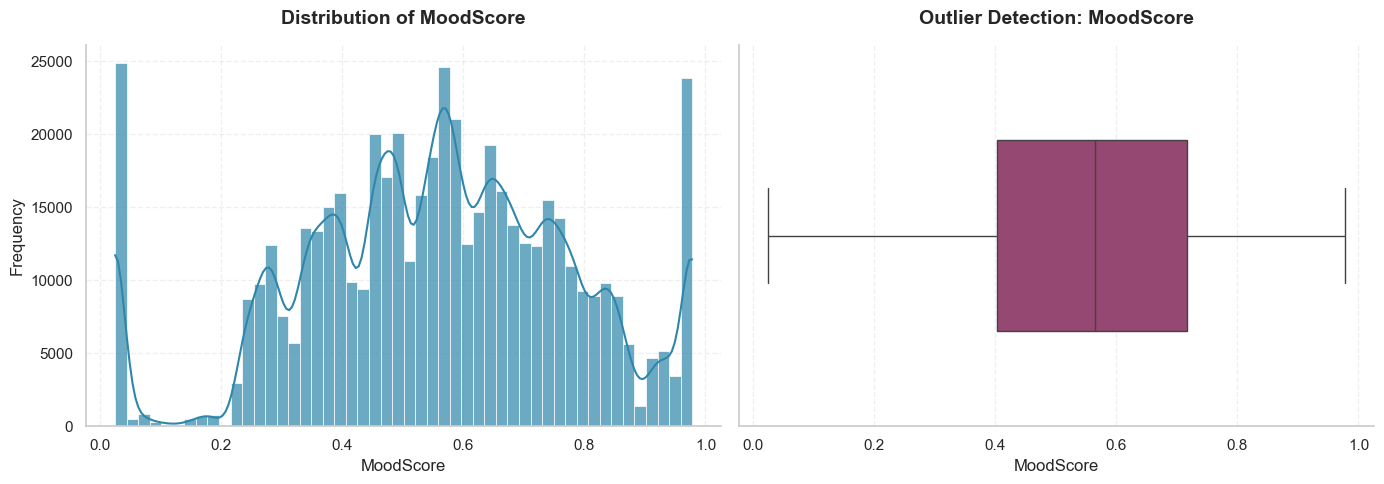

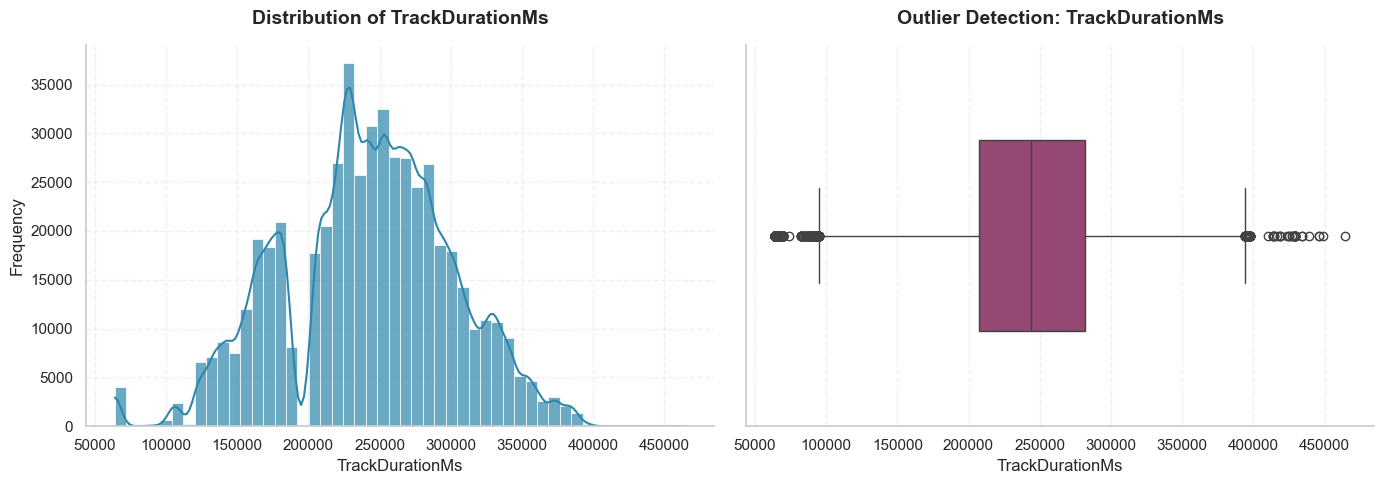

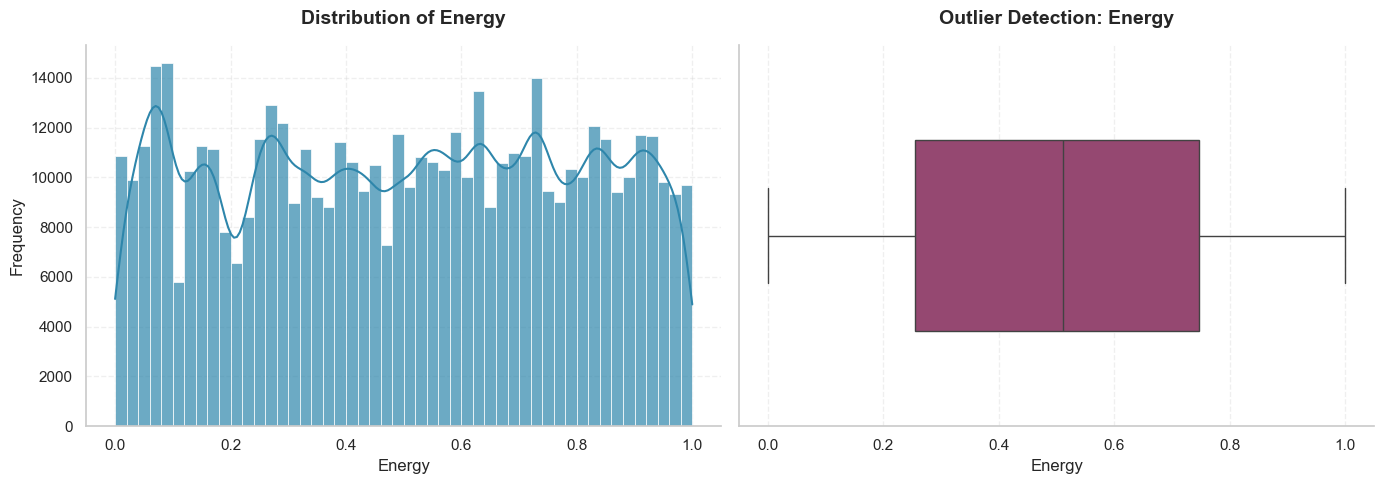

In [41]:
# Histograms + KDE & Boxplots
for col in features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram + KDE (left plot)
    sns.histplot(df[col], kde=True, bins=50, ax=axes[0], color=HIST_COLOR, 
                 edgecolor='white', linewidth=0.5, alpha=0.7)
    axes[0].set_title(f"Distribution of {col}", pad=15)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")
    axes[0].grid(alpha=0.3, linestyle='--')
    
    # Boxplot (right plot)
    sns.boxplot(x=df[col], ax=axes[1], color=BOX_COLOR, width=0.5)
    axes[1].set_title(f"Boxplot: {col}", pad=15)
    axes[1].set_xlabel(col)
    axes[1].grid(alpha=0.3, linestyle='--', axis='x')
    
    plt.tight_layout()
    plt.show()

The distribution plots confirm the numerical analysis:

- Features like InstrumentalScore and VocalContent show clear right skewness with concentration at lower values and long tails extending rightward, indicating most tracks have low to moderate values for these attributes.
- RhythmScore displays a more balanced, roughly normal distribution, making it well-suited for linear modeling assumptions.
- Energy shows a bimodal or irregular pattern, suggesting the presence of distinct track clusters (possibly genre-related), which could be valuable for segmentation.
- Boxplots reveal varying levels of outliers across features. TrackDurationMs and several other features show extreme values that, while potentially valid, may warrant investigation or robust modeling approaches.

The visual analysis confirms that while no severe data quality issues exist, the heterogeneity in distributions suggests that feature scaling and potentially selective transformations will be important preprocessing steps.


### Bivariate Analysis 

Assessing Linear Relationships and Multicollinearity
Correlation analysis helps identify redundant features (multicollinearity) and reveals linear relationships between predictors and the target variable. High inter-feature correlations may indicate opportunities for dimensionality reduction, while target correlations suggest predictive importance.


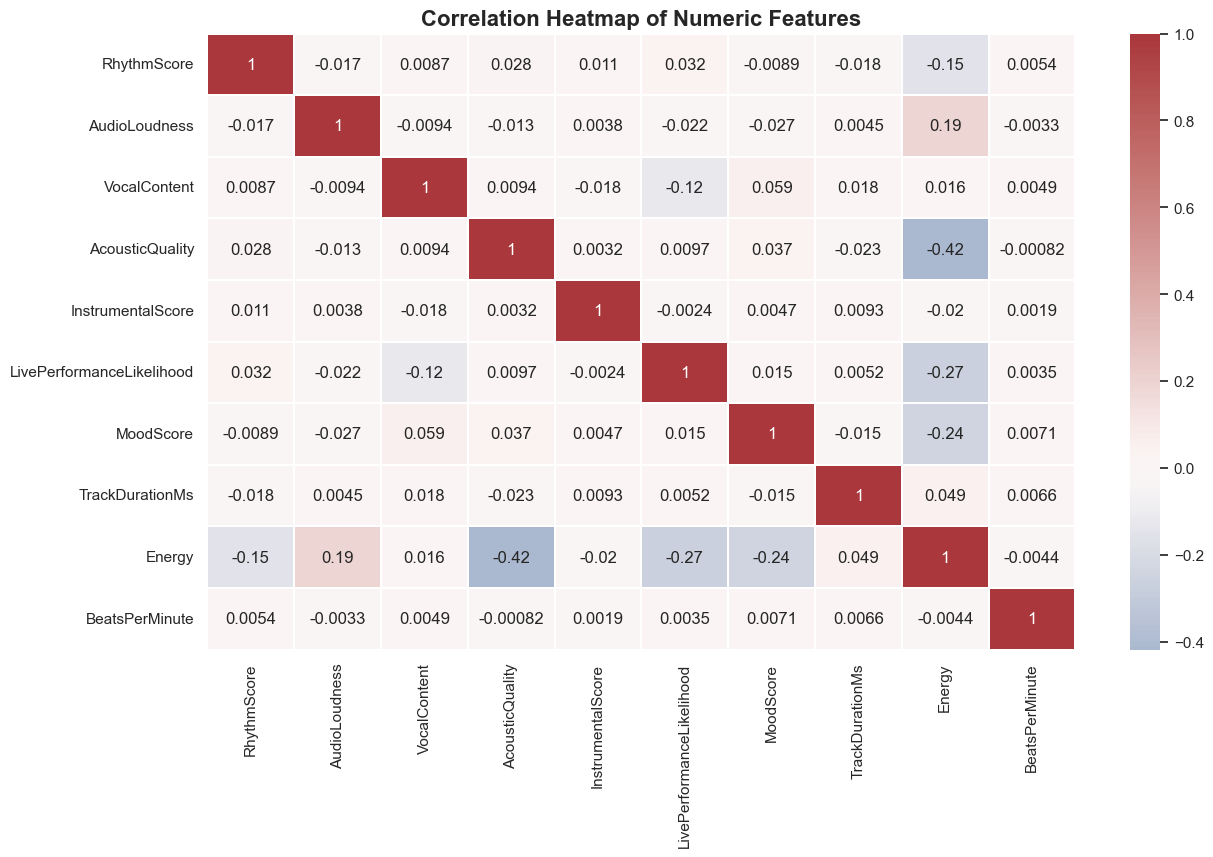

In [52]:
# Select only numeric features and drop 'id' if present
numeric_df = df.select_dtypes(include=['number']).drop(columns=['id'], errors='ignore')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    corr_matrix,
    annot=True,          # Disable numbers for clarity; enable if needed
    cmap="vlag",
    center=0,
    linewidths=0.3
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()


The correlation heatmap reveals several important patterns:

- Low target correlations: All features show weak linear correlations with BeatsPerMinute (absolute values below 0.02), suggesting that BPM is not strongly predicted by any single feature through simple linear relationships. This implies that either non-linear relationships dominate, interactions between features matter, or the target is influenced by factors not captured in the dataset.
  
- Minimal multicollinearity: Inter-feature correlations are generally weak, with most values below 0.4. The strongest correlations observed are between AcousticQuality and Energy (-0.42), LivePerformanceLikelihood and Energy (-0.27), and MoodScore and Energy (-0.24). These moderate negative correlations suggest that high-energy tracks tend to be less acoustic, less live-sounding, and have different mood profiles.
  
- Feature independence: The weak correlations indicate that features capture largely independent aspects of music tracks, reducing multicollinearity concerns and suggesting that most features contribute unique information to the model.

The absence of strong correlations with the target is notable—it suggests that BPM prediction will require capturing complex, non-linear patterns rather than simple weighted combinations of features.

### Statistical Significance Testing 

#### Correlation Tests (Pearson & Spearman)
Pearson correlation measures linear relationships, while Spearman captures monotonic relationships that may be non-linear. Comparing both reveals whether relationships are strictly linear or involve more complex patterns.

In [54]:

target = "BeatsPerMinute"

corr_results = []

for col in numeric_df.columns:
    if col == target:
        continue
        
    pearson_corr, pearson_p = pearsonr(df[col], df[target])
    spearman_corr, spearman_p = spearmanr(df[col], df[target])
    
    corr_results.append({
        "Feature": col,
        "Pearson": pearson_corr,
        "Pearson_p": pearson_p,
        "Spearman": spearman_corr,
        "Spearman_p": spearman_p
    })

import pandas as pd
corr_df = pd.DataFrame(corr_results)
corr_df.sort_values("Pearson", ascending=False)


,Feature,Pearson,Pearson_p,Spearman,Spearman_p
6,MoodScore,0.007059,3.211704e-07,0.006694,1.256743e-06
7,TrackDurationMs,0.006637,1.545203e-06,0.006901,5.834007e-07
0,RhythmScore,0.005440,8.195283e-05,0.005916,1.839649e-05
2,VocalContent,0.004876,4.148045e-04,0.003559,9.965757e-03
5,LivePerformanceLikelihood,0.003471,1.197958e-02,0.004368,1.566212e-03
4,InstrumentalScore,0.001900,1.688977e-01,0.002638,5.611554e-02
3,AcousticQuality,-0.000820,5.529096e-01,-0.000072,9.583270e-01
1,AudioLoudness,-0.003327,1.601764e-02,-0.002379,8.497363e-02
8,Energy,-0.004375,1.536785e-03,-0.003420,1.329147e-02


Despite the extremely small correlation coefficients, most features appear statistically significant (p < 0.05). This significance is driven almost entirely by the very large sample size (524,163 rows), not by meaningful predictive signal. In practical terms, the effect sizes are negligible—no individual feature shows enough linear association to explain meaningful variance in BeatsPerMinute.

The close alignment between Pearson and Spearman correlations indicates that the relationships are mostly linear and monotonic, with no evidence of stronger hidden non-linear patterns.

Overall, these findings suggest that:

- Simple linear relationships are insufficient to predict the target

- Higher-order interactions, feature combinations, and non-linear modeling techniques may be necessary to capture meaningful structure in the data

- Domain-informed transformations could improve signal extraction

#### Mutual Information Analysis
Mutual Information (MI) quantifies the amount of information one variable provides about another, capturing both linear and non-linear dependencies.

In [58]:

X = numeric_df.drop(columns=["BeatsPerMinute"])
y = numeric_df["BeatsPerMinute"]

mi = mutual_info_regression(X, y, random_state=42)
mi_df = pd.DataFrame({"Feature": X.columns, "MutualInformation": mi})
mi_df.sort_values("MutualInformation", ascending=False)


,Feature,MutualInformation
2,VocalContent,0.003417
8,Energy,0.001199
3,AcousticQuality,0.001158
5,LivePerformanceLikelihood,0.000806
0,RhythmScore,0.000562
7,TrackDurationMs,0.000370
6,MoodScore,0.000365
1,AudioLoudness,0.000000
4,InstrumentalScore,0.000000


The Mutual Information analysis ranks features by their total information content about BeatsPerMinute:

- Top informative features: VocalContent (0.0034), Energy (0.0012), and AcousticQuality (0.0012) contain the most information about the target. VocalContent's top ranking suggests that vocal presence has complex, potentially non-linear relationships with tempo that weren't fully captured by correlation analysis.
- Moderate information: LivePerformanceLikelihood, RhythmScore, TrackDurationMs, and MoodScore provide modest information (0.0003-0.0008).
- Minimal information: AudioLoudness and InstrumentalScore provide near-zero information, suggesting these features are largely independent of tempo.

Notably, the ranking differs slightly from correlation analysis (e.g., VocalContent ranks higher in MI than in Pearson), confirming the presence of non-linear relationships. However, all MI scores remain very small in absolute terms, reinforcing that BPM is challenging to predict from these features alone.

####  ANOVA Test

ANOVA (Analysis of Variance) tests whether the mean BeatsPerMinute differs significantly across groups defined by quartiles of each feature. This approach detects whether features can segment tracks into tempo-distinct groups.

In [59]:
from scipy.stats import f_oneway

for col in X.columns:
    df["bin"] = pd.qcut(df[col], 4, duplicates="drop")
    groups = [df[df["bin"] == b]["BeatsPerMinute"] for b in df["bin"].unique()]
    F, p = f_oneway(*groups)
    print(col, "ANOVA p-value:", p)


RhythmScore ANOVA p-value: 0.00013674703891253741
AudioLoudness ANOVA p-value: 0.1952688624598215
VocalContent ANOVA p-value: 0.0010545062108067798
AcousticQuality ANOVA p-value: 0.01250954832482521
InstrumentalScore ANOVA p-value: 0.38781194177402456
LivePerformanceLikelihood ANOVA p-value: 4.119499095341282e-05
MoodScore ANOVA p-value: 0.000545080529890661
TrackDurationMs ANOVA p-value: 4.675094933033663e-07
Energy ANOVA p-value: 0.0204842959213986


ANOVA results identify features that successfully partition tracks into tempo-distinct groups:

- Highly significant: TrackDurationMs (p < 0.0001), LivePerformanceLikelihood (p < 0.0001), and RhythmScore (p = 0.0001) show the strongest ability to segment tracks by tempo. This suggests that track duration, live performance characteristics, and rhythmic patterns are associated with distinct tempo profiles.
- Moderately significant: MoodScore (p = 0.0005), VocalContent (p = 0.001), AcousticQuality (p = 0.013), and Energy (p = 0.020) show significant but weaker segmentation ability.
Not significant: AudioLoudness (p = 0.195) and InstrumentalScore (p = 0.388) fail to create tempo-distinct groups, suggesting these features are largely independent of tempo across their range.

- The ANOVA results complement the earlier analyses, confirming that while linear correlations are weak, several features do create meaningful tempo-based segments—an insight valuable for tree-based models that naturally exploit such segmentation patterns.

### Multicolinearity Assessment 
#### Variance Inflation Factor (VIF) Analysis
Variance Inflation Factor quantifies how much the variance of regression coefficients is inflated due to multicollinearity. VIF values above 5-10 indicate problematic multicollinearity that can destabilize model coefficients and complicate interpretation.

In [66]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select features (exclude BPS and id)
X = df[[
    'RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
    'InstrumentalScore', 'LivePerformanceLikelihood', 'MoodScore',
    'TrackDurationMs', 'Energy'
]]

# Add constant term
X_const = sm.add_constant(X)

# Compute VIF
vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X_const.values, i+1)
            for i in range(len(X.columns))]
})

vif_data


,Feature,VIF
0,RhythmScore,1.026997
1,AudioLoudness,1.047485
2,VocalContent,1.019630
3,AcousticQuality,1.247175
4,InstrumentalScore,1.001096
5,LivePerformanceLikelihood,1.112631
6,MoodScore,1.079242
7,TrackDurationMs,1.003394
8,Energy,1.518756


The VIF analysis reveals excellent news for model development:

- All VIF values below 2: Every feature shows VIF values well below the conventional threshold of 5-10, with the highest being Energy (1.52) and AcousticQuality (1.25). This indicates minimal multicollinearity across the feature set.
- Feature independence confirmed: The low VIF values corroborate earlier correlation findings, confirming that features capture distinct aspects of musical tracks without substantial redundancy.
- Modeling implications: The absence of multicollinearity means that:
    - Linear model coefficients will be stable and interpretable
    - Feature selection won't be complicated by redundant variables
    - All features can be safely included without inflating standard errors
    - Tree-based models won't suffer from correlated feature selection instability



This clean feature set requires no dimensionality reduction or feature removal based on multicollinearity concerns, allowing us to leverage all available information during modeling.

## Summary

### **Target Variable**
- **BeatsPerMinute** is approximately normally distributed with minimal skewness → **no transformation needed**.
- Tempo ranges from **47 to 206 BPM**, covering diverse musical styles.
- A few outliers exist but appear to be **legitimate**, not errors.

### **Feature Behavior**
- Most features follow near-normal distributions; some show mild right-skew (e.g., *VocalContent*, *InstrumentalScore*).
- **No multicollinearity issues** (all VIF < 2).
- No major data quality concerns detected.

### **Relationships With the Target**
- Simple linear correlations with BPM are **extremely weak** (< 0.01).
- Many relationships are statistically significant **only due to large sample size**, not actual effect strength.
- **Mutual Information** indicates mild non-linear patterns missed by correlation, but the signal remains faint.
- Features with relatively stronger (though still weak) signals include:
  **TrackDurationMs, VocalContent, RhythmScore, LivePerformanceLikelihood**.

### **Implications for Modeling**
- **Linear Signal is Negligible:** Linear models are unlikely to perform better than a naive baseline given the lack of correlation.
- **Testing for Complexity:** The primary modeling objective is to determine if **tree-based models or neural networks** can capture non-linear patterns that standard correlation metrics missed.
- **Risk of Low Signal:** Given the low Mutual Information scores, there is a distinct possibility that **even complex models may struggle to extract predictive signal** from the current feature set.

### **Next Steps**
- Create interaction and non-linear features to potentially boost signal.
- **Benchmark** non-linear approaches (XGBoost, CatBoost, Neural Nets) against linear baselines to test if *any* learnable structure exists.
